#**Clustering Data**

Clustering is a method of grouping data into groups that have similar characteristics to one another. There are several methods for classifying data, one of which is the K-Means.

##Dataset Description##

This dataset comes from Kaggle with the following site https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python which is mall customer segmentation data. Consists of 5 variables, namely:
1. Customer ID, contains a unique number for each customer
2. Gender, contains the gender of the customer.
3. Age, contains the age of the customer.
4. Annual Income, contains customer income.
5. Spending score, contains the Score assigned by the mall based on customer behavior and spending nature.


##Program Description##

This program will cluster data using the K-Means algorithm to group mall visitors into several categories based on certain standards. The purpose of this program is to find insights from the data.

##Data Preparation##

Contains the process of selecting a library, reading the dataset file, and analyzing data from the dataset used (by checking the dataset used). 







In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import and read Dataset
df_mallcust = pd.read_csv('Mall_Customers.csv')
df_mallcust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Check data info
df_mallcust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#cek missing value data NaN
df_mallcust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
#Drop Unused columns
#column CustomerID is removed because it only contains the id of that visitor the information is less useful for the data clustering process.
df_mallcust.drop(['CustomerID'],axis=1,inplace=True)
df_mallcust

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [6]:
#Check descriptive statistics
#This is useful for knowing the highest value, mean and standard deviation of each data variable.
df_mallcust.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


###Data Distribution Visualization###

From the results of the data distribution, it can be concluded that the distribution of male and female customers is almost equal. Where the female customer has a percentage of 54.8% and male 45.2% of the total number of customers who have as many as 200, and mall visitors are more likely to be seen under 50 years of age. And most visitors are in the range of 20-30 years.

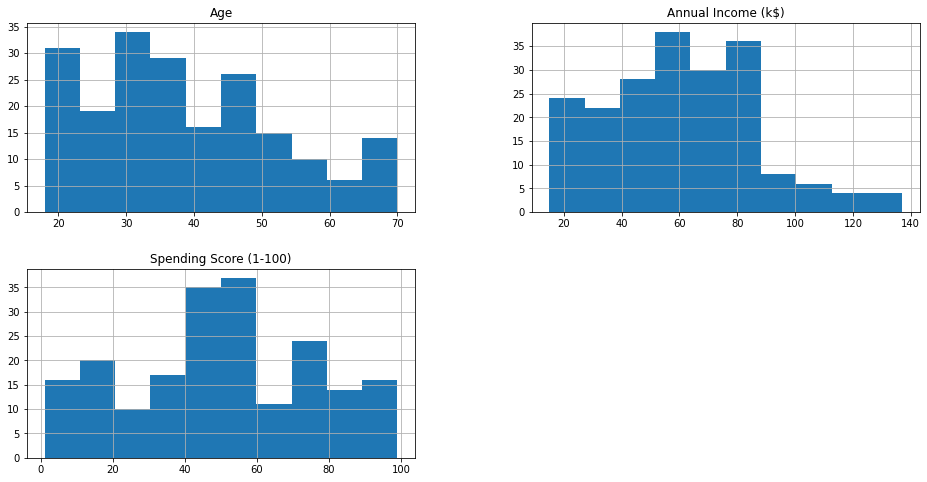

In [7]:
#Data Distribution Visualization
df_mallcust.hist(figsize=(16, 8))
plt.show()

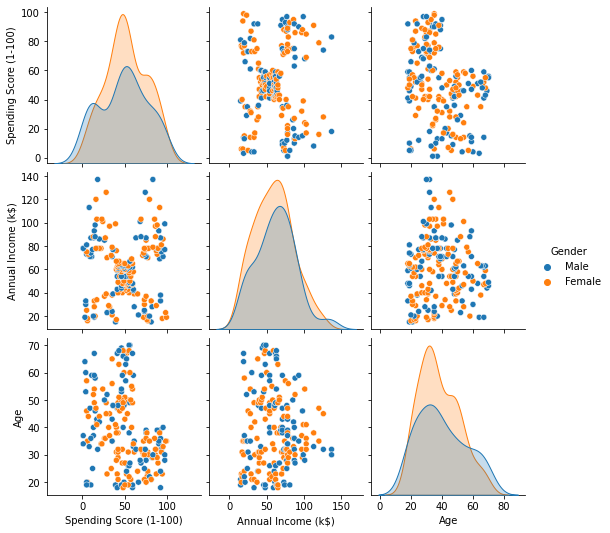

In [8]:
sns.pairplot(df_mallcust, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender")

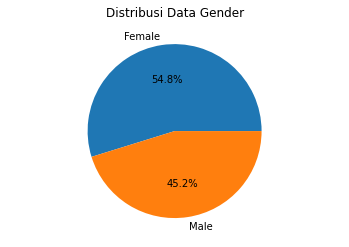

In [9]:
var=df_mallcust.groupby(['Gender']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['Annual Income (k$)']
label_list = temp.index
plt.axis("equal")
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("Distribusi Data Gender") 
plt.show()

###Correlation Matrix Between Variables###

To determine the relationship between variables. This process can help determine the variables that can be used for the clustering process. But in the correlation matrix of this dataset, it appears that each variable does not really have a strong influence on one another (seen from the small correlation value around -0.012 to 0.0099).But from the results of this correlation, it is found that the variables of annual income and spending score have the highest correlation value, so that the two variables are used for the classification process.









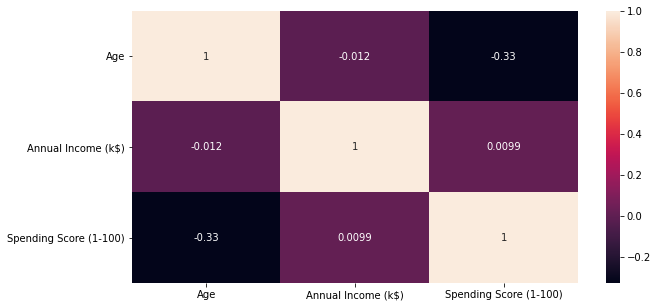

In [10]:
corelation = df_mallcust
plt.figure(figsize=(10,5))
sns.heatmap(df_mallcust.corr(),annot=True)
plt.show()

In [11]:
#drop unused column
df_mallcust.drop(['Gender','Age'],axis=1, inplace=True)
df_mallcust

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


##Data Pre-Processing##

Machine learing algorithms sometimes work better when features are at relatively similar scales and close to a normal distribution. The standard scaller function is needed to standardize data to equalize the range / variability of the data. Several methods that can be used in addition to the standard scaller are MinMax Scaller, Normalizer, and Robust Scaller.

In [12]:
#Import Library
from sklearn.preprocessing import StandardScaler 

#Setting nama untuk standar scaler
scaler = StandardScaler() 

#Fit Standardization terhadap kolom yang akan dilakukan klasterisasi
column_names = df_mallcust.columns.tolist()
df_mallcust[column_names] = scaler.fit_transform(df_mallcust[column_names])
df_mallcust.sort_index(inplace=True)
df_mallcust

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


##Data Visualtization##

Contains an overview of the distribution of data based on two categories, there are annual income and spending scores before the data clustering process is carried out.

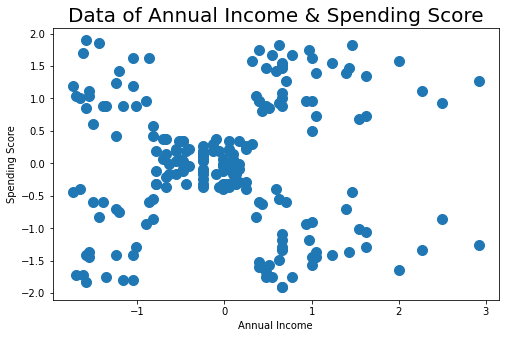

In [13]:
plt.figure(1 , figsize = (8 , 5))
plt.title('Data of Annual Income & Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df_mallcust, s = 100)
plt.show()

##K-Means Clustering##

K-Means Clustering is a data analysis method or Data Mining method that performs the modeling process without supervision (unsupervised) and is one of the methods that performs data grouping using a partition system. The purpose of this algorithm is to divide data into several groups. This algorithm accepts input in the form of data without class labels.

###Find ideal number of clastering###

By using the silhoutte method, it will be easier to predict and determine the correct and maximum K value from the classification process carried out. The value of K is taken from the result of the highest Silhoutte coefficient.

In [14]:
#Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

mallcust = df_mallcust.to_numpy()
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(mallcust)
    label = kmeans.labels_
    sil_coeff = silhouette_score(mallcust, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.29512063001659344
For n_clusters=3, The Silhouette Coefficient is 0.46658474419000145
For n_clusters=4, The Silhouette Coefficient is 0.4939069237513199
For n_clusters=5, The Silhouette Coefficient is 0.5546571631111091
For n_clusters=6, The Silhouette Coefficient is 0.5398800926790663
For n_clusters=7, The Silhouette Coefficient is 0.5281492781108291
For n_clusters=8, The Silhouette Coefficient is 0.45595198278798144
For n_clusters=9, The Silhouette Coefficient is 0.4607676809309511
For n_clusters=10, The Silhouette Coefficient is 0.4414773333399997


###K-Means Model###

In [15]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(mallcust)
df_mallcust['cluster'] = pd.DataFrame(y_kmeans)
df_mallcust.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,1
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,1
4,-1.662660,-0.395980,4


###Visualizing All Clusters###


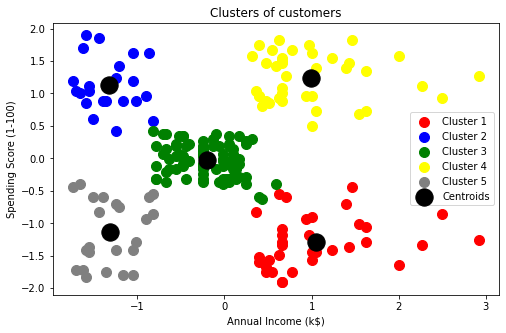

In [16]:
#Visualizing all the clusters 
plt.figure(figsize=(8,5))
plt.scatter(mallcust[y_kmeans == 0, 0], mallcust[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(mallcust[y_kmeans == 1, 0], mallcust[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(mallcust[y_kmeans == 2, 0], mallcust[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(mallcust[y_kmeans == 3, 0], mallcust[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(mallcust[y_kmeans == 4, 0], mallcust[y_kmeans == 4, 1], s = 100, c = 'grey', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [17]:
#Save Result
df_mallcust.to_csv('mallCust_clusters.csv', index=False)

##Conclusion##

From the above process we can conclude that mall customers can be grouped into 5 groups based on purchases. this is an explanation based on each cluster
- Cluster 1 (In Red), shows customers with high income, and low spending scores. Maybe these are people who are not satisfied with mall services or mall services are not suitable for their needs. Actually this could be the mall's main target customer, because they have the potential to spend money if there is a match. So that maybe mall managers can add new services that are more attractive to the public in this group.
- Cluster 2 (In Blue), shows customers with  low income, and high spending score. These are people who some reaso love to buy products more often eve though they have a low income or maybe it's because these people are more satisfed with the mall services. The mall might not target these people but still will not lose them. 
- Cluster 3 (In Green), Shows customers with average income and average spending scores.  These people will not be the prime targets of the mall, but they will be considered and other data analysis technique may be used to increase their spending score.
- Cluster 4 (In yellow), shows customer with high income and high spending scores. These people are the prime sources of profit. These people might be the regular custimers of the mall and statisfed with the mall services.
- Cluster 5 (In grey), shows customers with low income and low spending scores. Maybe hese people will not be target mall (The mall will be least interensted in this people). It's because these people are the wise people who know how to spend and save money.

**The brief conclusion is that the mall has 2 main segments that are the main target of revenue sources and 2 segments that should be analyzed more deeply because they are likely to be great opportunities in increasing mall revenue.